In [44]:
import pandas as pd

In [45]:
df_log = pd.read_csv('access_log.csv', parse_dates=['date'])

In [46]:
df_log.head()

,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04
3,4,790055,2015-07-04
4,4,764638,2015-07-04


In [47]:
df_log.describe(include='all')

<ipython-input-47-d8c3a6589b40>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_log.describe(include='all')


,user_id,item_id,date
count,325908.000000,3.259080e+05,325908
unique,NaN,NaN,8
top,NaN,NaN,2015-07-03 00:00:00
freq,NaN,NaN,45441
first,NaN,NaN,2015-07-01 00:00:00
last,NaN,NaN,2015-07-08 00:00:00
mean,212910.313681,5.552844e+05,NaN
std,122181.644006,3.208313e+05,NaN
min,4.000000,3.100000e+01,NaN
25%,108187.000000,2.793450e+05,NaN


In [48]:
df_log.user_id.value_counts().describe()

count    31443.000000
mean        10.365042
std         16.023399
min          2.000000
25%          3.000000
50%          5.000000
75%         11.000000
max        632.000000
Name: user_id, dtype: float64

In [49]:
df_log.item_id.value_counts().describe()

count    87611.000000
mean         3.719944
std          8.802572
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        941.000000
Name: item_id, dtype: float64

In [50]:
df_log['date'].value_counts().sort_index()

2015-07-01    44163
2015-07-02    45394
2015-07-03    45441
2015-07-04    43804
2015-07-05    39932
2015-07-06    33311
2015-07-07    33930
2015-07-08    39933
Name: date, dtype: int64

<AxesSubplot:>

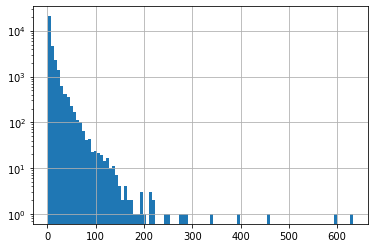

In [51]:
df_log.user_id.value_counts().hist(bins = 100, log=True)

<AxesSubplot:>

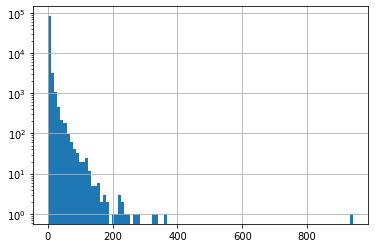

In [52]:
df_log.item_id.value_counts().hist(bins = 100, log=True)

In [53]:
from datetime import datetime
start_date = datetime(2015,7,1)
end_date = datetime(2015, 7, 7)
target_date = datetime(2015,7,8)

In [54]:
df_train = df_log[(start_date <= df_log['date']) & (df_log['date'] <= end_date)]
df_test = df_log[df_log['date']==target_date]

In [55]:
len(df_train) + len(df_test) == len(df_log)

True

In [56]:
calc_rcen = lambda x: (target_date - x).days

U2I2Rcens = {}
for r in df_train.itertuples():
    U2I2Rcens.setdefault(r.user_id, {})
    U2I2Rcens[r.user_id].setdefault(r.item_id, [])
    U2I2Rcens[r.user_id][r.item_id].append(calc_rcen(r.date))

In [57]:
U2I2Rcens[2497]

{400521: [4, 2, 2, 2, 1], 678277: [4], 687963: [2], 178138: [1]}

In [61]:
Rows1 = [[user_id, item_id, min(Rcens), len(Rcens)] 
            for user_id, I2Rcens in U2I2Rcens.items() 
            for item_id, Rcens in I2Rcens.items()]

df_UI2RF = pd.DataFrame(Rows1, columns='user_id item_id rcen freq'.split())


In [62]:
df_UI2RF.head()

,user_id,item_id,rcen,freq
0,4,205587,4,1
1,4,748683,4,1
2,4,790055,4,3
3,4,764638,4,2
4,4,492434,4,1


In [63]:
df_UI2RF.shape

(204661, 4)

In [64]:
df_test.shape

(39933, 3)

In [66]:
df_test = df_test.drop_duplicates()
df_test['pv_flag'] = 1

In [67]:
df_test

,user_id,item_id,date,pv_flag
103,94,603852,2015-07-08,1
104,94,28600,2015-07-08,1
105,94,987320,2015-07-08,1
106,94,109924,2015-07-08,1
107,94,886214,2015-07-08,1
...,...,...,...,...
325676,423919,707537,2015-07-08,1
325679,423919,692138,2015-07-08,1
325682,423919,617597,2015-07-08,1
325715,423958,963019,2015-07-08,1


In [68]:
df_UI2RF = pd.merge(df_UI2RF, df_test[['user_id', 'item_id', 'pv_flag']],
                    how='left', on=['user_id', 'item_id'])
df_UI2RF['pv_flag'].fillna(0, inplace=True)
print(df_UI2RF.shape)
df_UI2RF.head()

(204661, 5)


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [70]:
sorted(df_UI2RF['rcen'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [71]:
sorted(df_UI2RF['freq'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 31,
 32,
 34,
 35,
 41,
 43,
 58,
 63,
 118]

In [72]:
df_tar = df_UI2RF[df_UI2RF['freq'] <= 7]
df_tar

,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0
...,...,...,...,...,...
204656,424168,334989,7,1,0.0
204657,424168,454500,7,1,0.0
204658,424168,189002,7,1,0.0
204659,424168,1020948,7,1,0.0


In [73]:
df_tar.shape

(203456, 5)

In [74]:
df_tar['pv_flag'].sum()

2038.0

In [76]:
df_freq = pd.crosstab(index=df_tar['rcen'], columns=df_tar['pv_flag'])
df_rcen = df_rcen.rename(columns={0:'neg', 1:'pos'})
df_rcen

pv_flag,neg,pos
rcen,,
1,24595,571
2,24032,274
3,28212,326
4,30641,275
5,31510,225
6,31721,199
7,30707,168


<AxesSubplot:xlabel='rcen'>

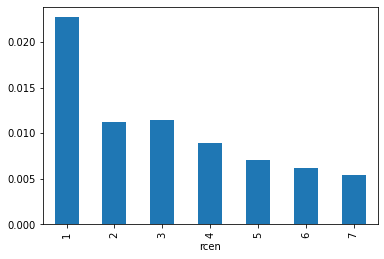

In [77]:
df_rcen['N'] = df_rcen['neg'] + df_rcen['pos']
df_rcen['prob'] = df_rcen['pos'] / df_rcen['N']
df_rcen['prob'].plot.bar()

<AxesSubplot:xlabel='rcen'>

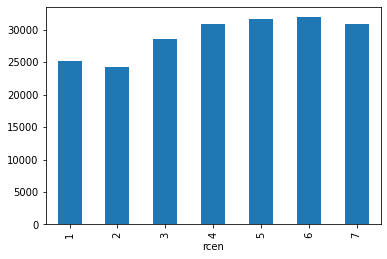

In [78]:
df_rcen['N'].plot.bar()

In [82]:
df_freq = pd.crosstab(index=df_tar['freq'], columns=df_tar['pv_flag'])
df_freq = df_freq.rename(columns={0:'neg', 1:'pos'})
df_freq

pv_flag,neg,pos
freq,,
1,161753,964
2,24938,476
3,7733,258
4,3527,149
5,1807,88
6,1038,63
7,622,40


<AxesSubplot:xlabel='freq'>

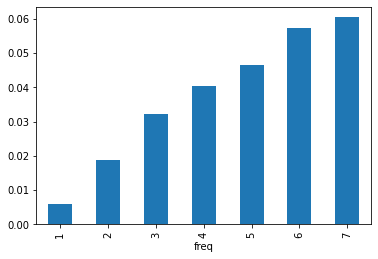

In [83]:
df_freq['N'] = df_freq['neg'] + df_freq['pos']
df_freq['prob'] = df_freq['pos'] / df_freq['N']
df_freq['prob'].plot.bar()